In [1]:
import pandas as pd

In [106]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [107]:
df=pd.read_csv("C:/Users/Pooja Kathe/Downloads/VehiclePerformancePrediction/Vehicle Performance Prediction/Dataset/LinearRegressionusingPython/Linear Regression using Python/Fish_dataset.csv")

In [108]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [152]:
new=df

In [153]:
new

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


### Exploratory analysis
there is no null value present in data

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [112]:
df.shape

(159, 7)

In [113]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [114]:
df.describe(include="object")

,Species
count,159
unique,7
top,Perch
freq,56


In [115]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [116]:
df.Species.value_counts().head() # only work with object datatype

Perch    56
Bream    35
Roach    20
Pike     17
Smelt    14
Name: Species, dtype: int64

In [117]:
df.isna().sum() ## no null value present in data

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

###  Q1)Plot a bar chart showing count of individual Species

Text(0, 0.5, 'count')

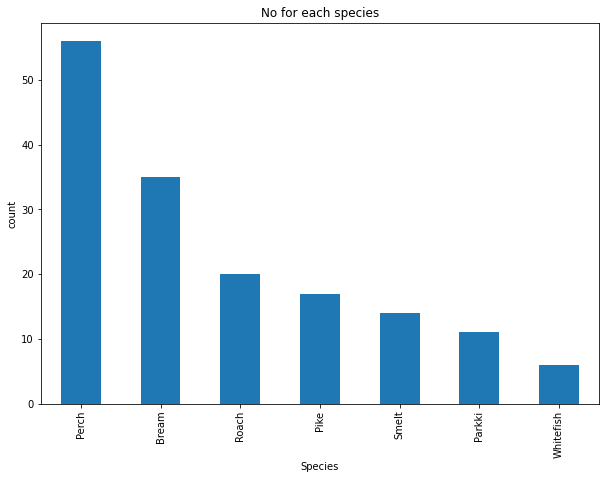

In [118]:
ax=df['Species'].value_counts().plot(kind='bar',figsize=(10,7),title='No for each species')
ax.set_xlabel("Species")
ax.set_ylabel("count")

### Q2)Identify outliers and remove if any?

In [119]:
df.drop("Species",inplace=True,axis=1)

In [120]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

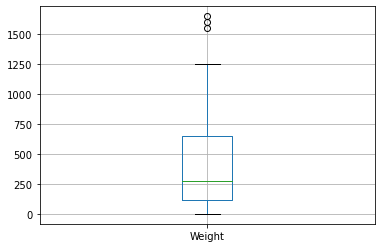

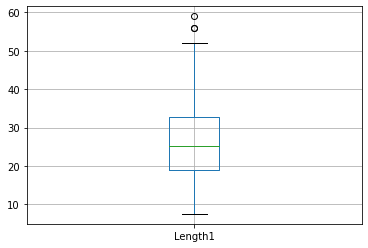

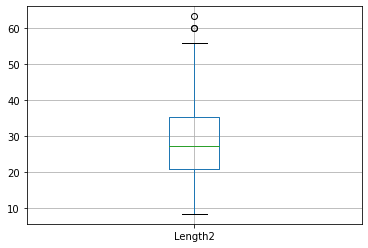

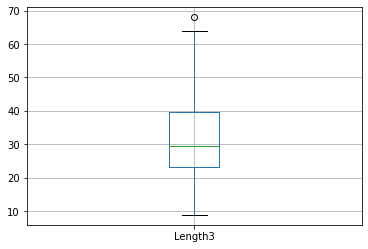

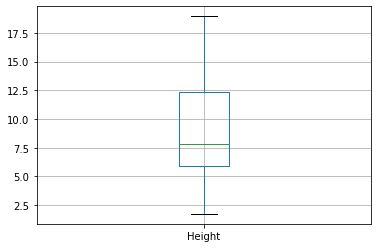

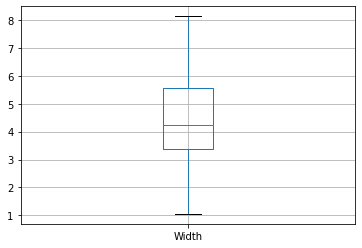

In [121]:
for column in df:
    plt.figure()
    df.boxplot([column])

from above box plot show that there is outliers present in Weight, Length1, Length2,Length3 .we can remove by  using IQR 

In [216]:
new=pd.read_csv("C:/Users/Pooja Kathe/Downloads/VehiclePerformancePrediction/Vehicle Performance Prediction/Dataset/LinearRegressionusingPython/Linear Regression using Python/Fish_dataset.csv")

In [217]:
new

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [218]:
# remove outliers in Weight column
Q1=np.quantile(new["Weight"],0.25)
Q3=np.quantile(new["Weight"],0.75)
IQR=Q3-Q1
print(IQR)

530.0


In [219]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit,upper_limit)

-675.0 1445.0


In [220]:
new[(new.Weight<lower_limit)|(new.Weight>upper_limit)]  ##this 3 value are outliers

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [221]:
## removing outliers
new_df=new[(new.Weight>lower_limit)&(new.Weight<upper_limit)]

In [222]:
new_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

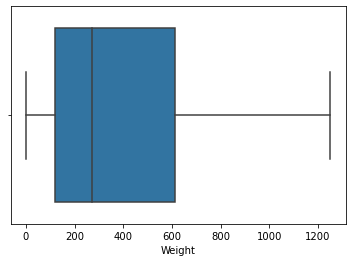

In [223]:
sns.boxplot(new_df["Weight"])

In [224]:
# remove outliers in Length1 column
Q1=np.quantile(new["Length1"],0.25)
Q3=np.quantile(new["Length1"],0.75)
IQR=Q3-Q1
print(IQR)

13.650000000000002


In [225]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit,upper_limit)

-1.4250000000000007 53.175000000000004


In [226]:
new[(new.Length1<lower_limit)|(new.Length1>upper_limit)] 

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [227]:
## removing outliers
new_df=new[(new.Length1>lower_limit)&(new.Length1<upper_limit)]

In [228]:
new_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [229]:
# remove outliers in Length2 column
Q1=np.quantile(new["Length2"],0.25)
Q3=np.quantile(new["Length2"],0.75)
IQR=Q3-Q1
print(IQR)

14.5


In [230]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit,upper_limit)

-0.75 57.25


In [231]:
new[(new.Length2<lower_limit)|(new.Length2>upper_limit)] 

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [232]:
## removing outliers
new_df=new[(new.Length1>lower_limit)&(new.Length1<upper_limit)]

In [233]:
new_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [234]:
# remove outliers in Length3 column
Q1=np.quantile(new["Length3"],0.25)
Q3=np.quantile(new["Length3"],0.75)
IQR=Q3-Q1
print(IQR)

16.500000000000007


In [235]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(lower_limit,upper_limit)

-1.600000000000012 64.40000000000002


In [236]:
new[(new.Length3<lower_limit)|(new.Length3>upper_limit)] 

,Species,Weight,Length1,Length2,Length3,Height,Width
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.48


In [237]:
## removing outliers
new_df=new[(new.Length3>lower_limit)&(new.Length3<upper_limit)]

In [238]:
new_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length3'>

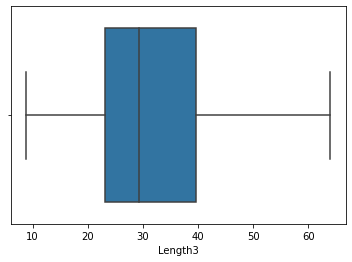

In [239]:
sns.boxplot(new_df["Length3"])

In [242]:
new_df.shape

(158, 7)

In [240]:
new_df2=new_df.reset_index()

In [243]:
new_df2

,index,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...,...
153,154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
154,155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
155,156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
156,157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [244]:
new_df2.shape

(158, 8)

### Base model
### Q3)Build a regression model and print regression equation?
### Q5)Compare real and predicted weights and give a conclusion statement based on it?

In [266]:
## Separate the Numerical and Categorical variables
df_num=new_df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]

In [267]:
df_num.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [268]:
df_dummies=pd.get_dummies(new_df[['Species']])

In [269]:
df_dummies.head()

,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [270]:
## combine the numeric and dummies variable
df_combine=pd.concat([df_num,df_dummies],axis=1)

In [271]:
df_combine.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [272]:
df_combine.shape

(158, 13)

In [273]:
y=df_combine["Weight"]
X=df_combine[['Width', 'Length1', 'Length2', 'Length3', 'Height','Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish']]

In [274]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [275]:
lm.fit(X,y) ## fit the model

LinearRegression()

In [276]:
lm

LinearRegression()

In [277]:
yhat=lm.predict(X)

In [278]:
yhat[0:5]

array([281.14756068, 333.81832386, 351.94455421, 438.12081609,
       431.19705141])

In [279]:
y[0:5]

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

Actual and Predicted Weight of Species are close to each other .there is not much difference in ACtual and Predicted value

In [280]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,yhat)
r_squared=r2_score(y,yhat)

In [281]:
from math import sqrt
rmse=sqrt(mse)

In [282]:
print("mean_squared_error:",mse)
print("root_mean_squared_error:",rmse)
print("r_squard_value",r_squared)

mean_squared_error: 7916.122141382389
root_mean_squared_error: 88.97259207970951
r_squard_value 0.9330107167897241


C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


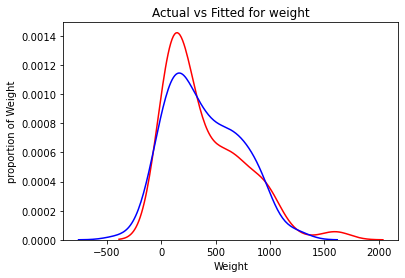

In [283]:
ax1=sns.distplot(df["Weight"],hist=False,color="r",label="Actual Values")
sns.distplot(yhat,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for weight")
plt.xlabel("Weight")
plt.ylabel("proportion of Weight")
plt.show()

In [284]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=["Coefficient"])

In [285]:
coeff_df

,Coefficient
Width,-0.578037
Length1,-65.602096
Length2,75.835529
Length3,20.561281
Height,12.908348
Species_Bream,-107.318873
Species_Parkki,37.025771
Species_Perch,27.525779
Species_Pike,-277.087208
Species_Roach,-1.544427


In [265]:
print(lm.intercept_)

-779.0062615683546


from the above result we may conclued that if Width increases by 1 unit ,it will affect Weight by -0.27803 units
and we increase the 1 unit of Length1 it will affect weight by -65.6020 

### Linear Regression on train test split

In [286]:
## take the values as X and Y
X=X.values
y=y.values

In [287]:
## split data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [288]:
model=LinearRegression()

In [289]:
model.fit(X_train,y_train)

LinearRegression()

In [290]:
## prediction for a single data point
yhat_t=model.predict(X_test)

In [291]:
yhat_t[0:4]

array([-16.91766567, 166.15516287,  19.09108708,  58.50123007])

In [293]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,yhat_t)
r_squared=r2_score(y_test,yhat_t)

In [294]:
from math import sqrt
rmse=sqrt(mse)

In [295]:
print("mean_squared_error:",mse)
print("root_mean_squared_error:",rmse)
print("r_squard_value",r_squared)

mean_squared_error: 6642.337560334292
root_mean_squared_error: 81.50053717819468
r_squard_value 0.9317075222305664


C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


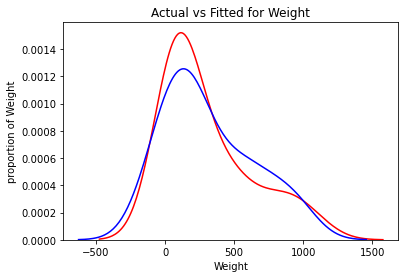

In [297]:
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Values")
sns.distplot(yhat_t,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for Weight")
plt.xlabel("Weight")
plt.ylabel("proportion of Weight")
plt.show()

#### Q4)What is the mean score of the model at 95% confidence interval

In [305]:
import scipy.stats as st
st.norm.interval(alpha=0.95,loc=np.mean(df_combine),scale=st.sem(df_combine))

(array([3.36632969e+02, 2.45306118e+01, 2.65759243e+01, 2.92371803e+01,
        8.28927796e+00, 4.13719158e+00, 1.56561719e-01, 2.98098856e-02,
        2.79607352e-01, 5.40763265e-02, 7.45712168e-02, 4.41560928e-02,
        8.07692728e-03]),
 array([4.44175892e+02, 2.75491350e+01, 2.98126833e+01, 3.27514273e+01,
        9.62940559e+00, 4.65901348e+00, 2.86476256e-01, 1.09430621e-01,
        4.29253407e-01, 1.48455319e-01, 1.78593340e-01, 1.33059097e-01,
        6.78724398e-02]))

In [298]:
model.fit(X_train,y_train)

LinearRegression()

In [299]:
model.score(X_train,y_train)

0.9314223091170888

In [300]:
model.score(X_test,y_test)

0.9317075222305664

In [301]:
from sklearn.model_selection import cross_val_score

In [302]:
Rcross=cross_val_score(model,X_train,y_train,cv=4) ## Rcross on train set

In [303]:
Rcross

array([0.9195791 , 0.92929837, 0.89832394, 0.835185  ])

#### There is no variability in Rscross of train data, hence this model is good